In [2]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import geopandas as gpd

from Illinois_network import *

In [3]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

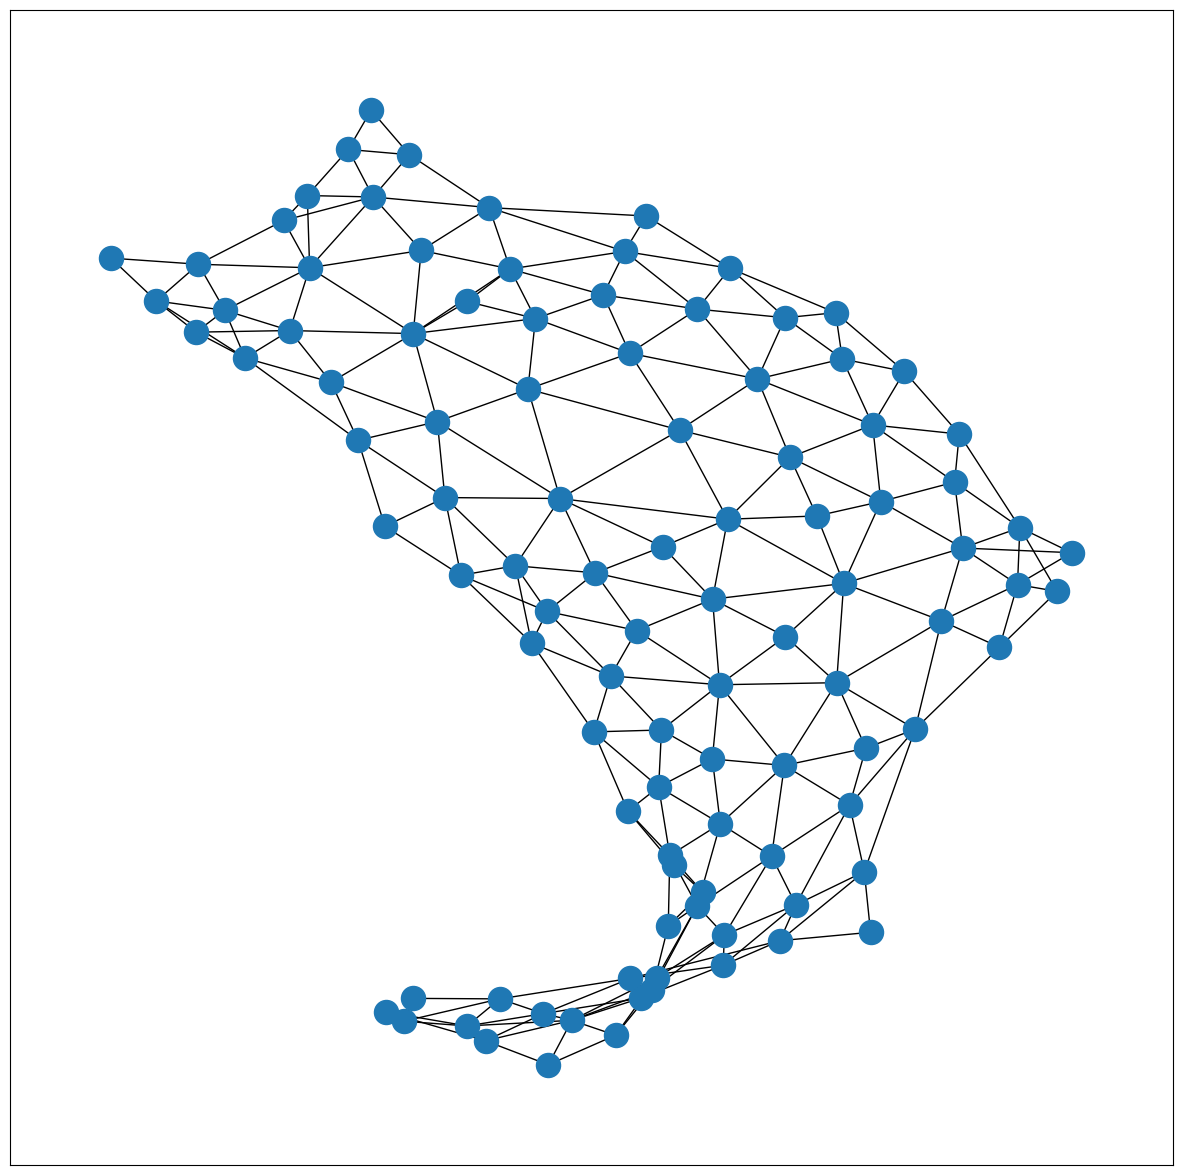

In [4]:
pos = nx.spring_layout(CG)
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx_nodes(CG, pos, ax=ax)
nx.draw_networkx_edges(CG, pos, ax=ax)
plt.show()

#### That Doesn't look like Illinois!

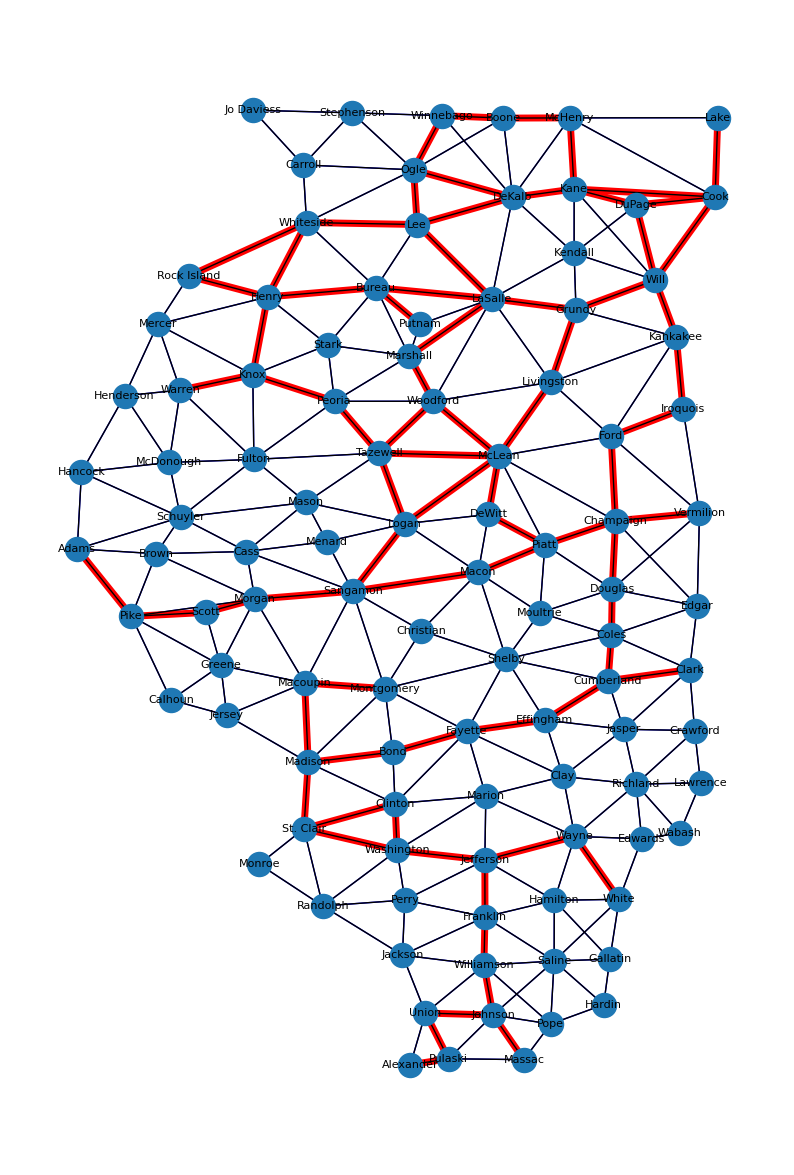

In [5]:
fig, ax = plt.subplots(figsize=(10, 15))

labels = {node: handler[node.name].name for node in CG.nodes()}
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}


edge_colors = ['red' if CG[src][tgt]['rel'] == 'interstate' else 'blue' for src, tgt in CG.edges()]
edge_widths = [5 if CG[src][tgt]['rel'] == 'interstate' else 1 for src, tgt in CG.edges()]
nx.draw_networkx_edges(CG, pos=node_positions, edge_color=edge_colors, ax=ax, width=edge_widths)

nx.draw(CG, pos=node_positions, ax=ax)
nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=8, ax=ax)
plt.show()

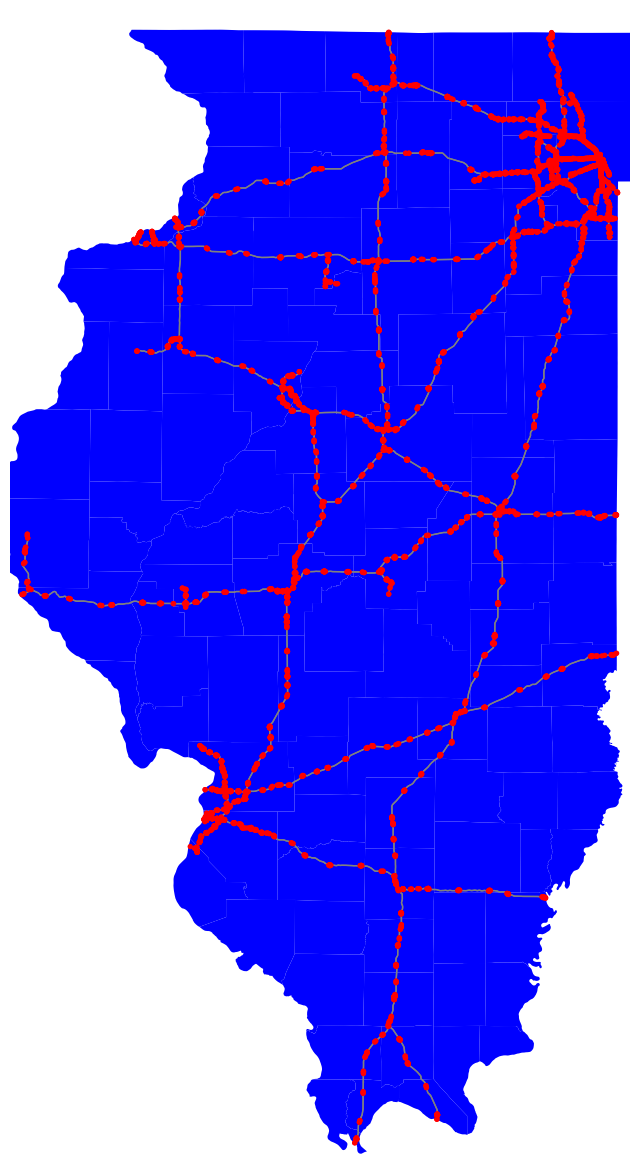

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
cgdf = gpd.GeoDataFrame({'geometry': [handler[county].geometry for county in handler]})

cgdf.plot(ax=ax, color='blue')

ox.plot_graph(highways, ax=ax, node_color='r', edge_color='gray')

{<my_classes.County at 0x1ca1a3bb6d0>: Text(-87.64586901586009, 41.89561310743707, 'Cook'),
 <my_classes.County at 0x1ca1b3a9f50>: Text(-88.085616963798, 41.85194801392289, 'DuPage'),
 <my_classes.County at 0x1ca1b3aa090>: Text(-88.42863661892792, 41.93886261834667, 'Kane'),
 <my_classes.County at 0x1ca1b3aa1d0>: Text(-87.97867967240714, 41.44509773689722, 'Will'),
 <my_classes.County at 0x1ca1b3aa310>: Text(-89.16070533167691, 42.33635592181084, 'Winnebago'),
 <my_classes.County at 0x1ca1b3aa490>: Text(-87.63137597056462, 42.32535780850523, 'Lake'),
 <my_classes.County at 0x1ca1b3aa690>: Text(-88.45200657445464, 42.32437130588661, 'McHenry'),
 <my_classes.County at 0x1ca1b3aa890>: Text(-89.92946232240219, 38.47086425121318, 'St. Clair'),
 <my_classes.County at 0x1ca1b3aaa90>: Text(-88.42888400201146, 41.59054429726196, 'Kendall'),
 <my_classes.County at 0x1ca1b3aac90>: Text(-89.90550979335477, 38.83004600326634, 'Madison'),
 <my_classes.County at 0x1ca1b3aae90>: Text(-90.5686561067879

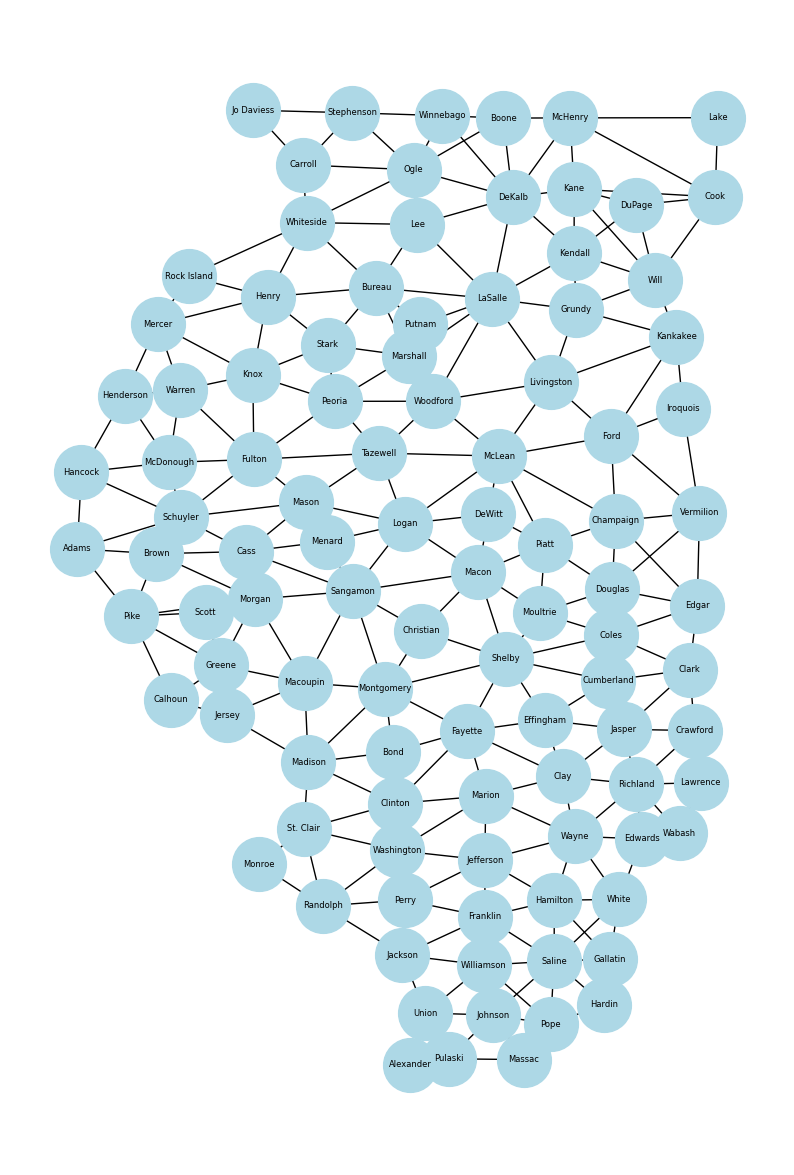

In [7]:
labels = {node: handler[node.name].name for node in CG.nodes()}
fig, ax = plt.subplots(figsize=(10, 15))
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
nx.draw(CG, pos=node_positions, ax=ax, node_color='#ADD8E6', node_size=1500, )
nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=6, ax=ax)

In [8]:
for node in CG.nodes():
    neighbors = [neighbor.name for neighbor in CG.neighbors(node)]
    print(f'Node {node.name} borders: {neighbors}\n')
    # print(node.name)

Node Cook borders: ['McHenry', 'Lake', 'Will', 'DuPage', 'Kane']

Node DuPage borders: ['Cook', 'Will', 'Kendall', 'Kane']

Node Kane borders: ['Cook', 'DeKalb', 'DuPage', 'McHenry', 'Will', 'Kendall']

Node Will borders: ['Cook', 'DuPage', 'Grundy', 'Kane', 'Kankakee', 'Kendall']

Node Winnebago borders: ['Boone', 'DeKalb', 'Ogle', 'Stephenson']

Node Lake borders: ['Cook', 'McHenry']

Node McHenry borders: ['Boone', 'Cook', 'DeKalb', 'Kane', 'Lake']

Node St. Clair borders: ['Clinton', 'Madison', 'Monroe', 'Randolph', 'Washington']

Node Kendall borders: ['DeKalb', 'DuPage', 'Grundy', 'Kane', 'Will', 'LaSalle']

Node Madison borders: ['Bond', 'Clinton', 'Jersey', 'Macoupin', 'Montgomery', 'St. Clair']

Node Rock Island borders: ['Henry', 'Mercer', 'Whiteside']

Node Peoria borders: ['Fulton', 'Knox', 'Marshall', 'Stark', 'Woodford', 'Tazewell']

Node Sangamon borders: ['Cass', 'Christian', 'Logan', 'Macon', 'Macoupin', 'Menard', 'Montgomery', 'Morgan']

Node Tazewell borders: ['Fulto

In [9]:
def get_node_by_name(graph, name_to_find):
    for node in graph.nodes():
        if hasattr(node, 'name') and node.name == name_to_find:
            return node
    return None
get_node_by_name(CG, 'Cook')

In [10]:
def get_neighbor_objects(graph, name):
    node_list = []
    for node in graph.nodes():
        if hasattr(node, 'name') and node.name == name:
            node_list.append(node)
    return node

node_list = get_neighbor_objects(CG, 'Scott')
print(node_list)

In [14]:
for node in CG.nodes():
    print(f"'{node.name}',")

'Cook',
'DuPage',
'Kane',
'Will',
'Winnebago',
'Lake',
'McHenry',
'St. Clair',
'Kendall',
'Madison',
'Rock Island',
'Peoria',
'Sangamon',
'Tazewell',
'Champaign',
'Boone',
'Macon',
'Kankakee',
'DeKalb',
'Williamson',
'McLean',
'Grundy',
'Coles',
'Jackson',
'LaSalle',
'Franklin',
'Vermilion',
'Monroe',
'Stephenson',
'Whiteside',
'Adams',
'Clinton',
'Knox',
'Woodford',
'Effingham',
'Ogle',
'Marion',
'Jefferson',
'Saline',
'Massac',
'Morgan',
'Henry',
'Jersey',
'Randolph',
'McDonough',
'Macoupin',
'Wabash',
'Perry',
'Logan',
'Lee',
'Christian',
'Douglas',
'Bond',
'Lawrence',
'Richland',
'Crawford',
'Moultrie',
'Montgomery',
'Union',
'Fulton',
'DeWitt',
'Menard',
'Bureau',
'Piatt',
'Livingston',
'Johnson',
'Jo Daviess',
'Cass',
'Putnam',
'Warren',
'Carroll',
'Clark',
'Cumberland',
'Alexander',
'Marshall',
'Fayette',
'Edwards',
'Pulaski',
'Clay',
'Edgar',
'White',
'Shelby',
'Ford',
'Mercer',
'Iroquois',
'Washington',
'Mason',
'Greene',
'Hardin',
'Wayne',
'Hancock',
'Brown',
'Scott',
'Stark'

In [15]:
    cumulative_df = pd.DataFrame(['Cook',
                                    'DuPage',
                                    'Kane',
                                    'Will',
                                    'Winnebago',
                                    'Lake',
                                    'McHenry',
                                    'St. Clair',
                                    'Kendall',
                                    'Madison',
                                    'Rock Island',
                                    'Peoria',
                                    'Sangamon',
                                    'Tazewell',
                                    'Champaign',
                                    'Boone',
                                    'Macon',
                                    'Kankakee',
                                    'DeKalb',
                                    'Williamson',
                                    'McLean',
                                    'Grundy',
                                    'Coles',
                                    'Jackson',
                                    'LaSalle',
                                    'Franklin',
                                    'Vermilion',
                                    'Monroe',
                                    'Stephenson',
                                    'Whiteside',
                                    'Adams',
                                    'Clinton',
                                    'Knox',
                                    'Woodford',
                                    'Effingham',
                                    'Ogle',
                                    'Marion',
                                    'Jefferson',
                                    'Saline',
                                    'Massac',
                                    'Morgan',
                                    'Henry',
                                    'Jersey',
                                    'Randolph',
                                    'McDonough',
                                    'Macoupin',
                                    'Wabash',
                                    'Perry',
                                    'Logan',
                                    'Lee',
                                    'Christian',
                                    'Douglas',
                                    'Bond',
                                    'Lawrence',
                                    'Richland',
                                    'Crawford',
                                    'Moultrie',
                                    'Montgomery',
                                    'Union',
                                    'Fulton',
                                    'DeWitt',
                                    'Menard',
                                    'Bureau',
                                    'Piatt',
                                    'Livingston',
                                    'Johnson',
                                    'Jo Daviess',
                                    'Cass',
                                    'Putnam',
                                    'Warren',
                                    'Carroll',
                                    'Clark',
                                    'Cumberland',
                                    'Alexander',
                                    'Marshall',
                                    'Fayette',
                                    'Edwards',
                                    'Pulaski',
                                    'Clay',
                                    'Edgar',
                                    'White',
                                    'Shelby',
                                    'Ford',
                                    'Mercer',
                                    'Iroquois',
                                    'Washington',
                                    'Mason',
                                    'Greene',
                                    'Hardin',
                                    'Wayne',
                                    'Hancock',
                                    'Brown',
                                    'Scott',
                                    'Stark',
                                    'Jasper',
                                    'Hamilton',
                                    'Pike',
                                    'Henderson',
                                    'Calhoun',
                                    'Schuyler',
                                    'Gallatin',
                                    'Pope']).reset_index
cumulative_df.insert

<bound method DataFrame.reset_index of              0
0         Cook
1       DuPage
2         Kane
3         Will
4    Winnebago
..         ...
97   Henderson
98     Calhoun
99    Schuyler
100   Gallatin
101       Pope

[102 rows x 1 columns]>

In [18]:
# Define a dictionary containing Students data
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'],
        'Height': [5.1, 6.2, 5.1, 5.2],
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']}
 
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
 
# Using DataFrame.insert() to add a column
df.insert(2, "Age", [21, 23, 24, 21], True)
 
# Observe the result
print(df)

     Name  Height  Age Qualification
0     Jai     5.1   21           Msc
1  Princi     6.2   23            MA
2  Gaurav     5.1   24           Msc
3    Anuj     5.2   21           Msc
